# Exercise solutions

## 1. to 11.

## 1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster-using Gradient Descent than using the Normal Equation or SVD decomposition.

## Here are some of GD:

### 1. Stochastic Gradient Descent (SGD):
SGD does not require storing or inverting large matrices, which is computationally expensive with millions of features.
It iteratively updates weights using small batches (or single examples), making it memory-efficient.
How: It updates the parameters𝜃 based on the gradient of the cost function for one training example (or a small batch):

### 2. Mini-Batch Gradient Descent:
Why:Similar to SGD but processes a small batch of examples at each iteration, offering a balance between computational efficiency and gradient noise reduction.
How: It computes gradients on mini-batches of the data, allowing more parallelization compared to pure SGD.
    

## Other technic:

### 1. Coordinate Descent:
It is efficient when the feature matrix is sparse (many features but most have zero values).
Instead of updating all parameters at once, it updates one parameter at a time while keeping others fixed.
How do it: Cycles through each parameter and optimizes it, leveraging sparsity for faster convergence.

### 2. Feature Selection + Dimensionality Reduction Techniques
When millions of features are present, many might be irrelevant or redundant. Reducing the feature space makes learning more efficient.
How to do: Use methods like Principal Component Analysis (PCA) to project features into a lower-dimensional space.
Apply techniques like L1 regularization (Lasso Regression) to automatically perform feature selection.

### 3. Online Learning Algorithms:
Ideal for streaming data or when it’s infeasible to load the entire dataset into memory.
Incrementally updates the model with each new data point.
How: Extends SGD by updating the model weights as new data arrives.




## 2.  Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

Algorithms that rely on distances to optimize their parameters, like Linear regression with gradient descent. Algorithms may suffer from different feature scales because the optimal optimization path is not straight. More precisely, feature scaling effects parameter scaling in the loss curve.

The simple solution is to normalize/standarize all features to be in ranges such as or using $[0,1]$ $[-1,1]$ mean/standard diviation to center feature distributions around $0$ with $theta=1$.


Note that the normal equation/SVD approach will work just fine without the need for feature scaling.

Added to the problem of regularizing a model with different feature scales is the possibility to convert the found configuration to a suboptimal solution.

## 3. Can gradient descent get stuck in a local minimum when training a logistic regression model?

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

Two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum.

If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high). So, it will not be stuck at the local minimum.

## 4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while.

## 5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this

When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. So, it means the model is overfitting.

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

## 6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error. So, stopping Mini-batch Gradient Descent immediately is a good idea and it is better to use Batch GD as it takes all the training set rather than a randomized training set.

## 7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. So, Stochastic and Mini-batch Gradient Descent will reach the vicinity of the optimal solution but the fastest is Stochastic GD.

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while. When the cost function (below image) is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.



## 8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

Three ways to solve: Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.



## 9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

Both curves have reached a plateau; they are close and fairly high. The model suffers from high bias.

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression.

Increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias. So, reducing hyperparameter α will reduce the bias.


## 10. Why would you want to use:

• Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?

• Lasso instead of Ridge Regression?

• Elastic Net instead of Lasso?

    - This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
    - An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).
    - Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.


## 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?).

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

The logistic — noted σ(・) — is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. Once the Logistic Regression model has estimated the probability p = hθ(x) that an instance x belongs to the positive class, it can make its prediction ŷ easily

Logistic Regression model prediction

y =

0 if p < 0 . 5

1 if p ≥ 0 . 5

SoftMax Regression: The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture. Let’s use Softmax Regression to classify the iris flowers into all three classes.

Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

So, since I want to classify pictures as outdoor/indoor and daytime/nighttime that means whether 1 or 0 classifier is enough that means I can use binary classifier aka Logistic Regression.

Ref. https://anjancse07.medium.com/solution-of-the-exercises-hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow-78457a7b08d3

## 12. Implement Batch Gradient Descent with Early Stopping for Softmax Regression (Without the use of Scikit-Learn)

Let's do it using the MNIST Dataset:

In [138]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [139]:
X, y = datasets.load_digits(return_X_y=True)

In [140]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
X_test, y_test = X_val, y_val

In [145]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

(-0.5, 7.5, 7.5, -0.5)

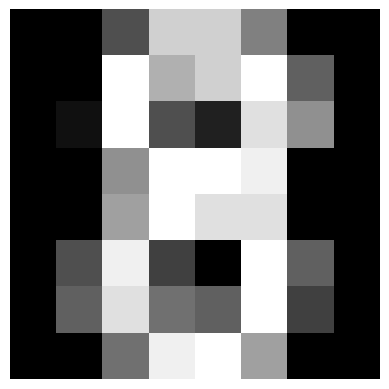

In [168]:
plt.imshow(X_train[0].reshape(8,8), cmap='gray')
plt.axis('off')

In [147]:
y_train[0]

8

## 1.Softmax Regression:

In [169]:
m, n = X_train.shape
K = len(set(y_train))
m, n, K

(1257, 64, 10)

In [170]:
X_train_ = np.concatenate((np.ones((m, 1)), X_train), axis=1)
X_train_.shape

(1257, 65)

In [171]:
X_val_ = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
X_val_.shape

(540, 65)

In [172]:
W = np.random.rand(n+1, K)

In [173]:
def softmax(u):
    """Calculate the softmax vector using the input matrix
    
    # Arguments
        u: np.ndarray, input matrix of samples
    
    # Returns
        v: np.nadarray, softmaxed output matrix
    """
    return np.exp(u)/np.sum(np.exp(u), axis=1)[:,None]

In [174]:
def linear(X, W):
    """A Simple Linear Transformation
    """
    return np.matmul(X, W)

In [175]:
softmax(linear(X_train_, W)).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

## 2. Batch Gradient Descent"

In [176]:
def cross_entropy(preds, targets):
    """Returns Cross Entropy Loss for Multi-class Classification"""
    
    m, K = preds.shape
    log_p = np.log(preds)
    y_logp = targets * log_p  # elementwise
    return (-1/m) * y_logp.sum(axis=1).sum()

In [177]:
def one_hot(u):
    m, K = u.shape[0], len(set(u))
    encoded = np.zeros((m, K))
    for i, u_i in enumerate(u):
        encoded[i][u_i] = 1
    return encoded

In [178]:
p_hat = softmax(linear(X_train_, W))
p_hat.shape, y_train.shape

((1257, 10), (1257,))

In [179]:
cross_entropy(p_hat, one_hot(y_train))

33.477514313286534

In [180]:
def grad_cross_entropy(inputs, preds, targets):
    """Calculate the gradient of the cross entropy loss function."""
    
    m, n = inputs.shape
    k = preds.shape[1]
    err = preds - targets
    return (1./m) * np.matmul(inputs.T, err)

In [181]:
X_train_.shape, p_hat.shape, one_hot(y_train).shape

((1257, 65), (1257, 10), (1257, 10))

In [182]:
grad_cross_entropy(X_train_, p_hat, one_hot(y_train)).shape

(65, 10)

## 3. Early Stopping

In [183]:
def early_stop(val_losses):
    """Returns True if current_val_loss > prev_val_loss"""
    
    if len(val_losses) > 1:
        if val_losses[-1] > val_losses[-2]:
            return True
    return False

## 4. Training Loop

In [184]:
epochs, lr = 10000, 0.02
train_losses, val_losses = list(), list()

In [185]:
W = np.random.rand(n+1, K)

In [191]:
index =1
for epoch in range(epochs):
    # forward pass
    y_preds = softmax(linear(X_train_, W))
    
    # calculate train loss
    train_loss = cross_entropy(y_preds, one_hot(y_train))
    train_losses.append(train_loss)
    
    # calculate validation loss
    val_loss = cross_entropy(softmax(linear(X_val_, W)), one_hot(y_val))
    val_losses.append(val_loss)
    
    # Optimize parameters
    W = W - (lr * grad_cross_entropy(X_train_, y_preds, one_hot(y_train)))
    
    index+=1
    # early stop
    if early_stop(val_losses):
        break

index

338

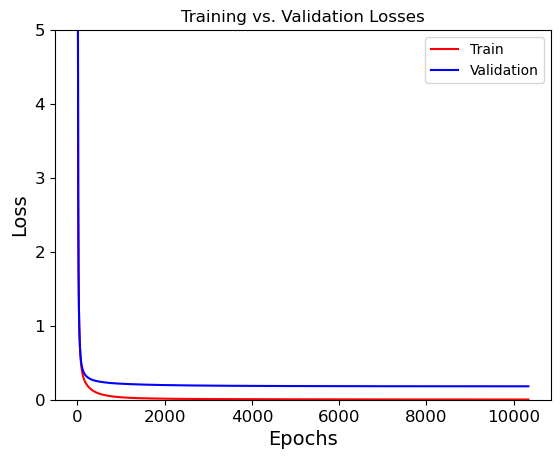

In [192]:
plt.plot(range(len(train_losses)), train_losses, color='red', label='Train')
plt.plot(range(len(val_losses)), val_losses, color='blue', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,5)
plt.legend()
plt.title('Training vs. Validation Losses')
plt.show()

In [196]:
train_losses[len(train_losses) -1], val_losses[len(val_losses) -1]

(0.002917773699601118, 0.1815608858137482)

In [197]:
train_losses[index -1], val_losses[index -1]

(0.13009329102961045, 0.2696773701098687)

In [188]:
# Let's check our accuracy over the validation set:
val_preds = np.argmax(softmax(linear(X_val_, W)), axis=1)

In [189]:
acc = ((val_preds == y_val).sum())/len(val_preds)
acc

0.9592592592592593

We got ~95% accuracy over unseen data.

Ref. https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/04.Training-Models.ipynb

See appendix A.

## 12. Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn)

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [67]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [68]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [69]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [70]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [71]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [72]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [73]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [74]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [75]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [76]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [77]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [78]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [79]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [80]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [81]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [82]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399382
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [83]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

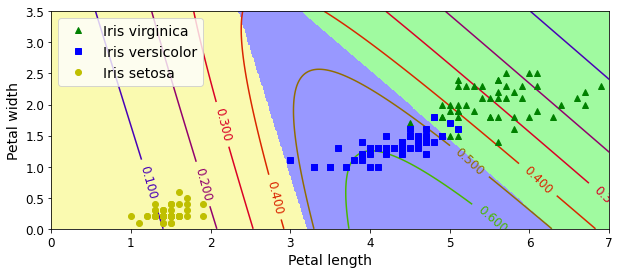

In [84]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [85]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.